In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pickle

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# This notebook shows big-picture mass-balances for the BR, LA, and PI run scenarios - domain total DIC, surface DIC, and surface 20m DIC. It also looks at the different components of the budget for the 3 scenarios, as follows:

     
    REMAINDER = [end-of-year change] - [sources-and-sinks]
    
    sources-and-sinks = [CO2_flux + JDF_transport + JS_transpot + river_loading]

    signs of components:
    
    CO2 flux - always net negative (out of strait)
    JS flux - always net positive (into strait)
    JdF flux - always net negative (out of strait)
    lateral flux - always net positive (into strait)
    river loading - always a net positive (into strait), by simple definition
    
    Needn't be steady-state - can have an end-of-year change
    


    BUDGET SKETCH:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT_JDF + BOUNDARY_TRANSPORT_JS 
    

    

In [5]:
BR_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2015_3_fullyear.nc')
PI_ACBC_2015_3_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_ACBC_2015_3_fullyear.nc')
PI_ACBC_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_ACBC_2015_2_fullyear.nc')

In [6]:
stor_mol_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_3 = PI_2015_3_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JS']

stor_mol_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_BR_15_2 = BR_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JS']

stor_mol_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_mol']
stor_mol_surf_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_mol_deep']
stor_flx_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_flx']
stor_trans_JDF_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_ACBC_15_3 = PI_ACBC_2015_3_nc['model_output']['stor_trans_JS']

stor_mol_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JS']

days_in = np.arange(0,np.size(stor_mol_PI_15_3),1)

## How much more or less carbon do we have at the end of the year than at the beginning?

#### end of year change (%) - BR, LA, PI_2, PI_3
#### BR: -0.09352618944831192 BR
#### LA: -0.15828183386474848
#### PI_2: -0.3555213799700141
####  PI_3: 0.06811852217651904

In [7]:
print('full domain mass balance')
print('beginning of year - BR, LA, PI_2, PI_3')
print(stor_mol_BR_15_2[0])
print(stor_mol_PI_15_3[0])
print(stor_mol_PI_ACBC_15_2[0])
print(stor_mol_PI_ACBC_15_3[0])
print('end of year - BR, LA, PI_2, PI_3')
print(stor_mol_BR_15_2[364])
print(stor_mol_PI_15_3[364])
print(stor_mol_PI_ACBC_15_2[364])
print(stor_mol_PI_ACBC_15_3[364])
print('end of year change - BR, LA, PI_2, PI_3')
print(stor_mol_BR_15_2[364]-stor_mol_BR_15_2[0]) 
print(stor_mol_PI_15_3[364]-stor_mol_PI_15_3[0])
print(stor_mol_PI_ACBC_15_2[364]-stor_mol_PI_ACBC_15_2[0])
print(stor_mol_PI_ACBC_15_3[364]-stor_mol_PI_ACBC_15_3[0])
print('end of year change (%) - BR, LA, PI_2, PI_3')
print((stor_mol_BR_15_2[364]-stor_mol_BR_15_2[0])/ stor_mol_BR_15_2[0]*100)
print((stor_mol_PI_15_3[364]-stor_mol_PI_15_3[0])/ stor_mol_PI_15_3[0]*100)
print((stor_mol_PI_ACBC_15_2[364]-stor_mol_PI_ACBC_15_2[0])/ stor_mol_PI_ACBC_15_2[0]*100)
print((stor_mol_PI_ACBC_15_3[364]-stor_mol_PI_ACBC_15_3[0])/ stor_mol_PI_ACBC_15_3[0]*100)


full domain mass balance
beginning of year - BR, LA, PI_2, PI_3
4748102600000.0
4726752000000.0
4662564500000.0
4646499000000.0
end of year - BR, LA, PI_2, PI_3
4743662000000.0
4719270400000.0
4645988000000.0
4649664400000.0
end of year change - BR, LA, PI_2, PI_3
-4440719400.0
-7481590000.0
-16576414000.0
3165126700.0
end of year change (%) - BR, LA, PI_2, PI_3
-0.09352618944831192
-0.15828183386474848
-0.3555213799700141
0.06811852217651904


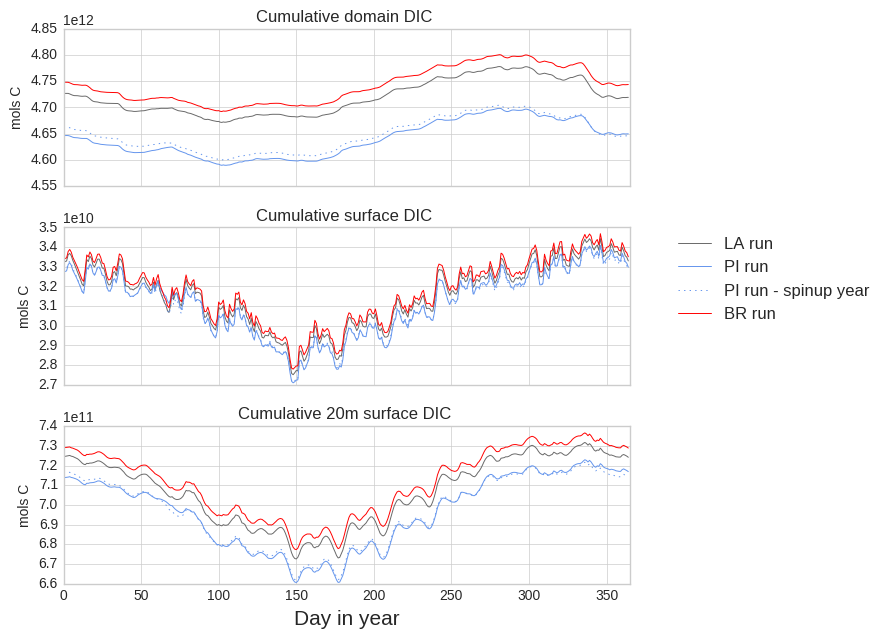

In [8]:
figstring = 'this'
fact = 0.65
fig = plt.figure(figsize=(10*fact,10*fact))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_mol_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_mol_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)
ax.plot(days_in,stor_mol_PI_ACBC_15_2,color = 'cornflowerblue',linestyle = ':',label = '2015 PI_ACBC 2', linewidth = 0.7)

ax.plot(days_in,stor_mol_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_mol_surf_PI_15_3,color = 'dimgrey',label = 'LA run', linewidth = 0.7)
ax.plot(days_in,stor_mol_surf_PI_ACBC_15_3,color = 'cornflowerblue',label = 'PI run', linewidth = 0.7)
ax.plot(days_in,stor_mol_surf_PI_ACBC_15_2,color = 'cornflowerblue', linestyle = ':', label = 'PI run - spinup year', linewidth = 0.7)

ax.plot(days_in,stor_mol_surf_BR_15_2,color = 'red',label = 'BR run', linewidth = 0.7)
#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(3,1,3)
ax.plot(days_in,stor_mol_20_PI_15_3,color = 'dimgrey',label = 'LA run', linewidth = 0.7)
ax.plot(days_in,stor_mol_20_PI_ACBC_15_3,color = 'cornflowerblue',label = 'PI run', linewidth = 0.7)
ax.plot(days_in,stor_mol_20_PI_ACBC_15_2,color = 'cornflowerblue', linestyle = ':', label = 'PI run - spinup year', linewidth = 0.7)

ax.plot(days_in,stor_mol_20_BR_15_2,color = 'red',label = 'BR run', linewidth = 0.7)
ax.legend(bbox_to_anchor=[1.45, 2.3, 0, 0])
ax.set_ylabel('mols C')
plt.xlim([0,365])
txticks = np.arange(0,360,60)
#ax.set_xticklabels()
ax.set_xlabel('Day in year', fontsize = 15)
plt.title('Cumulative 20m surface DIC ')
 

plt.tight_layout()


In [9]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
t_mask = grid['tmask']
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]* t_mask[0,:,0:878,20:398]

wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398] * t_mask[0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]* t_mask[0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]* t_mask[0,27:40,0:878,20:398]
surfa = vdir*udir
surfa_mask = vdir*udir*t_mask[0,0,0:878,20:398]

In [10]:
t_mask = grid['tmask']


In [11]:
wdir_deep_0 = grid['e3t_0'][0,27:40,0,0]


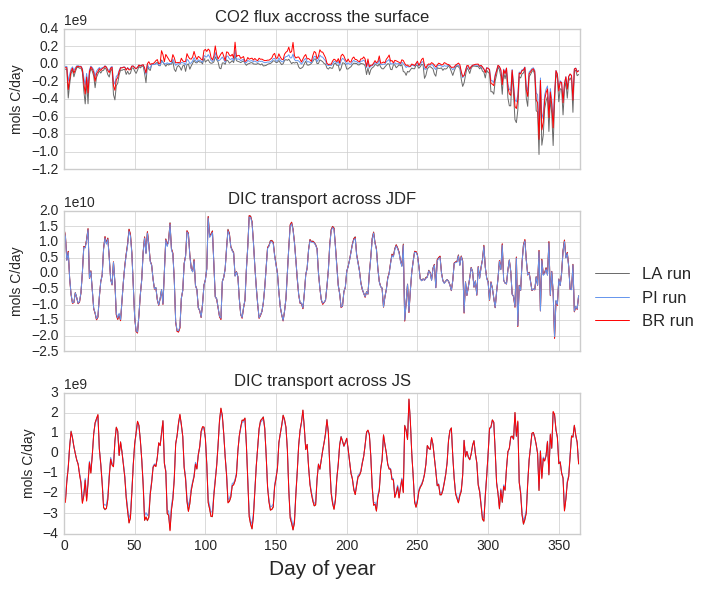

In [12]:
figstring = 'this'
fact = 0.6
fig = plt.figure(figsize=(10*fact,10*fact))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_flx_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_flx_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)
ax.plot(days_in,stor_flx_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_trans_JDF_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_trans_JDF_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
ax.plot(days_in,stor_trans_JDF_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
ax.plot(days_in,stor_trans_JS_PI_15_3,color = 'dimgrey',label = 'LA run', linewidth = 0.7)
ax.plot(days_in,stor_trans_JS_PI_ACBC_15_3,color = 'cornflowerblue',label = 'PI run', linewidth = 0.7)
ax.plot(days_in,stor_trans_JS_BR_15_2,color = 'red',label = 'BR run', linewidth = 0.7)
ax.legend(bbox_to_anchor=[1.25, 2, 0, 0])
ax.set_ylabel('mols C/day')
ax.set_xlabel('Day of year', fontsize = 15)
plt.title('DIC transport across JS')
plt.tight_layout()

In [13]:
print('2015 LA outgassing days', 365-np.size(np.where(stor_flx_PI_15_3[:] >0)))
print('2015 PI outgassing days', 365-np.size(np.where(stor_flx_PI_ACBC_15_3[:] >0)))

print('2015 BR outgassing days', 365-np.size(np.where(stor_flx_BR_15_2[:] >0)))

2015 LA outgassing days 276
2015 PI outgassing days 212
2015 BR outgassing days 177


In [14]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]
wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]
surfa = vdir*udir

In [15]:
# fact = 0.6
# fig = plt.figure(figsize=(10*fact,4*fact))

 
# ax = fig.add_subplot(1,1,1)

# ax.plot(days_in,stor_flx_PI_15_3[:]/1e9,color = 'dimgrey',label = 'LA (Low Atmosphere), Days Outgassing = 276', linewidth = 2)
# ax.plot(days_in,stor_flx_PI_ACBC_15_3[:]/1e9,color = 'cornflowerblue',label = 'PI (Preindustrial), Days Outgassing = 212', linewidth = 2)

# ax.plot(days_in,stor_flx_BR_15_2[:]/1e9,color = 'red',label = 'BR (Base Run/Present-Day), Days Outgassing = 177', linewidth = 2)
# ax.plot(days_in, np.zeros_like(days_in), color = 'k', linewidth = 0.9)
# plt.xlim([0,365])
# ax.legend(bbox_to_anchor=[2.05, 1.0, 0, 0])
# xtl = np.arange(0,400,50)
# ytl = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4]
# ax.set_ylim([-1.2,0.4])
# ax.set_yticklabels(ytl, fontsize = 18)
# ax.set_xticklabels(xtl, fontsize = 18)
# ax.set_ylabel('GMol C/day', fontsize = 20)
# ax.set_xlabel('day of year', fontsize = 20)
# plt.title('Domain total: CO$_2$ flux across the surface', fontsize = 20)

In [16]:
river_load15 = np.float32(1.6911e11)
river_load16 = np.float32(1.6795e11)

EOY_BR2015_2 = np.sum(stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1])
BR2015_2_change = (stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1]-(stor_mol_BR_15_2[0]))
FLUX_BR2015_2 = np.sum(stor_flx_BR_15_2)
JDFTRANS_BR2015_2 = np.sum(stor_trans_JDF_BR_15_2)
JSTRANS_BR2015_2 = -np.sum(stor_trans_JS_BR_15_2)
blackbox_BR_15_2 = (BR2015_2_change - (FLUX_BR2015_2 + JDFTRANS_BR2015_2 + JSTRANS_BR2015_2 + river_load15))

EOY_PI2015_3 = np.sum(stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1])
PI2015_3_change = (stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1]-(stor_mol_PI_15_3[0]))
FLUX_PI2015_3 = np.sum(stor_flx_PI_15_3)
JDFTRANS_PI2015_3 = np.sum(stor_trans_JDF_PI_15_3)
JSTRANS_PI2015_3 = -np.sum(stor_trans_JS_PI_15_3)
blackbox_PI_15_3 = (PI2015_3_change - (FLUX_PI2015_3 + JDFTRANS_PI2015_3 + JSTRANS_PI2015_3 + river_load16))

EOY_PI_ACBC2015_3 = np.sum(stor_mol_PI_ACBC_15_3[np.size(stor_mol_PI_ACBC_15_3)-1])
PI_ACBC2015_3_change = (stor_mol_PI_ACBC_15_3[np.size(stor_mol_PI_ACBC_15_3)-1]-(stor_mol_PI_ACBC_15_3[0]))
FLUX_PI_ACBC2015_3 = np.sum(stor_flx_PI_ACBC_15_3)
JDFTRANS_PI_ACBC2015_3 = np.sum(stor_trans_JDF_PI_ACBC_15_3)
JSTRANS_PI_ACBC2015_3 = -np.sum(stor_trans_JS_PI_ACBC_15_3)
blackbox_PI_ACBC_15_3 = (PI_ACBC2015_3_change - (FLUX_PI_ACBC2015_3 + JDFTRANS_PI_ACBC2015_3 + JSTRANS_PI_ACBC2015_3 + river_load16))

EOY_PI_ACBC2015_2 = np.sum(stor_mol_PI_ACBC_15_2[np.size(stor_mol_PI_ACBC_15_2)-1])
PI_ACBC2015_2_change = (stor_mol_PI_ACBC_15_2[np.size(stor_mol_PI_ACBC_15_2)-1]-(stor_mol_PI_ACBC_15_2[0]))
FLUX_PI_ACBC2015_2 = np.sum(stor_flx_PI_ACBC_15_2)
JDFTRANS_PI_ACBC2015_2 = np.sum(stor_trans_JDF_PI_ACBC_15_2)
JSTRANS_PI_ACBC2015_2 = -np.sum(stor_trans_JS_PI_ACBC_15_2)
blackbox_PI_ACBC_15_2 = (PI_ACBC2015_3_change - (FLUX_PI_ACBC2015_3 + JDFTRANS_PI_ACBC2015_3 + JSTRANS_PI_ACBC2015_3 + river_load16))


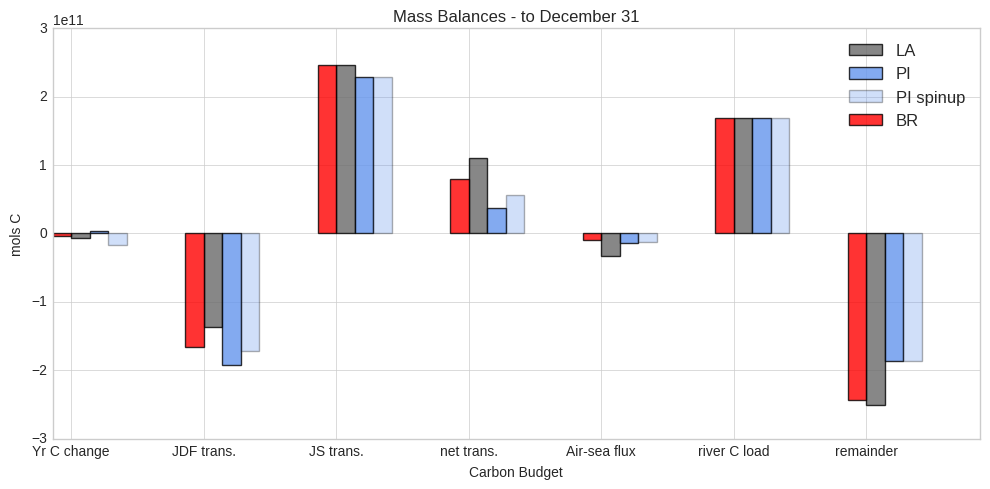

In [17]:
# data to plot
n_groups = 7
PI15_3_stats = (PI2015_3_change, JDFTRANS_PI2015_3, JSTRANS_PI2015_3, JSTRANS_PI2015_3 + JDFTRANS_PI2015_3,  FLUX_PI2015_3, river_load15, blackbox_PI_15_3)
BR15_2_stats = (BR2015_2_change, JDFTRANS_BR2015_2, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_2,  FLUX_BR2015_2, river_load15, blackbox_BR_15_2)
PI_ACBC15_3_stats = (PI_ACBC2015_3_change, JDFTRANS_PI_ACBC2015_3, JSTRANS_PI_ACBC2015_3, JSTRANS_PI_ACBC2015_3 + JDFTRANS_PI_ACBC2015_3,  FLUX_PI_ACBC2015_3, river_load15, blackbox_PI_ACBC_15_3)
PI_ACBC15_2_stats = (PI_ACBC2015_2_change, JDFTRANS_PI_ACBC2015_2, JSTRANS_PI_ACBC2015_2, JSTRANS_PI_ACBC2015_2 + JDFTRANS_PI_ACBC2015_2,  FLUX_PI_ACBC2015_2, river_load15, blackbox_PI_ACBC_15_2)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8

rects3 = plt.bar(index + bar_width*1, PI15_3_stats, bar_width,
alpha=opacity,
color='dimgrey',
label='LA')

rects3 = plt.bar(index + bar_width*2, PI_ACBC15_3_stats, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI')

rects3 = plt.bar(index + bar_width*3, PI_ACBC15_2_stats, bar_width,
alpha=0.3,
color='cornflowerblue',
label='PI spinup')

rects5 = plt.bar(index + bar_width*0, BR15_2_stats, bar_width,
alpha=opacity,
color='red',
label='BR')




plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('Yr C change', 'JDF trans.', 'JS trans.', 'net trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

## Monthly concentrations and mass_balances

In [18]:
#monthly calcuations

# BR_dir = '/data/tjarniko/results/BASERUN_EXP/MAIN/BR_2nd_2015/MONTHLY/'

# test_dat = nc.Dataset(BR_dir + 'SKOG_1m_2015jan_2015jan_carp_T.nc')

# mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# BR_hov = np.zeros([40,12])

# for m in range(0,12):
#     tnam = 'SKOG_1m_2015' + mons[m] + '_2015' + mons[m] + '_carp_T.nc'
#     print(tnam)
#     test_dat = nc.Dataset(BR_dir + tnam)
#     for i in range(0,40):
#         DIC_dat = test_dat['dissolved_inorganic_carbon'][0,i,:,:]

#         DIC_dat[DIC_dat == 0 ] = np.nan

#         w = np.nanmean(DIC_dat)
#         BR_hov[i,m] = w




# LA_dir = '/data/tjarniko/results/BASERUN_EXP/MAIN/PI_3rd_2015/MONTHLY/'

# test_dat = nc.Dataset(LA_dir + 'SKOG_1m_2015jan_2015jan_carp_T.nc')

# mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# LA_hov = np.zeros([40,12])

# for m in range(0,12):
#     tnam = 'SKOG_1m_2015' + mons[m] + '_2015' + mons[m] + '_carp_T.nc'
#     print(tnam)
#     test_dat = nc.Dataset(LA_dir + tnam)
#     for i in range(0,40):
#         DIC_dat = test_dat['dissolved_inorganic_carbon'][0,i,:,:]

#         DIC_dat[DIC_dat == 0 ] = np.nan

#         w = np.nanmean(DIC_dat)
#         LA_hov[i,m] = w

        

# PI_dir = '/data/tjarniko/results/BASERUN_EXP/MAIN/PI_ACBC_2015_3/MONTHLY/'

# test_dat = nc.Dataset(LA_dir + 'SKOG_1m_2015jan_2015jan_carp_T.nc')

# mons = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

# PI_hov = np.zeros([40,12])

# for m in range(0,12):
#     tnam = 'SKOG_1m_2015' + mons[m] + '_2015' + mons[m] + '_carp_T.nc'
#     print(tnam)
#     test_dat = nc.Dataset(PI_dir + tnam)
#     for i in range(0,40):
#         DIC_dat = test_dat['dissolved_inorganic_carbon'][0,i,:,:]

#         DIC_dat[DIC_dat == 0 ] = np.nan

#         w = np.nanmean(DIC_dat)
#         PI_hov[i,m] = w


# import pickle
# pickle.dump(BR_hov, open("BR_hov.pkl", 'wb'))
# pickle.dump(PI_hov, open("PI_hov.pkl", 'wb'))
# pickle.dump(LA_hov, open("LA_hov.pkl", 'wb'))

In [19]:
f = open('./pickles/BR_hov.pkl', 'rb')
BR_hov = pickle.load(f)   
f = open('./pickles/PI_hov.pkl', 'rb')
PI_hov = pickle.load(f) 
f = open('./pickles/LA_hov.pkl', 'rb')
LA_hov = pickle.load(f) 

## Another way to see differences:
## Find monthly concentration by layer for BR, PI, LA.
## These are DOMAIN AVERAGES - averages of all non-0 DIC cells for a given layer (ie, river cells are excluded)


In [20]:
# print('jan first layer')
# print(BR_hov[0,0])
# print('dec first layer')
# print(BR_hov[0,11])
# print('jan last 38 layer')
# print(BR_hov[38,11])
# print('dec last 38 layer')
# print(BR_hov[38,11])




In [21]:
PI_hov_percent = np.zeros_like(BR_hov)
LA_hov_percent = np.zeros_like(LA_hov)


for d in range(0,39):
    for m in range(0,12):
        LA_hov_percent[d,m] = ((BR_hov[d,m]-LA_hov[d,m])/BR_hov[d,m]*100)
        PI_hov_percent[d,m] = ((BR_hov[d,m]-PI_hov[d,m])/BR_hov[d,m]*100)
        
# print(np.min(LA_hov_percent))
# print(np.max(LA_hov_percent))
# print(np.min(PI_hov_percent))
# print(np.max(PI_hov_percent))

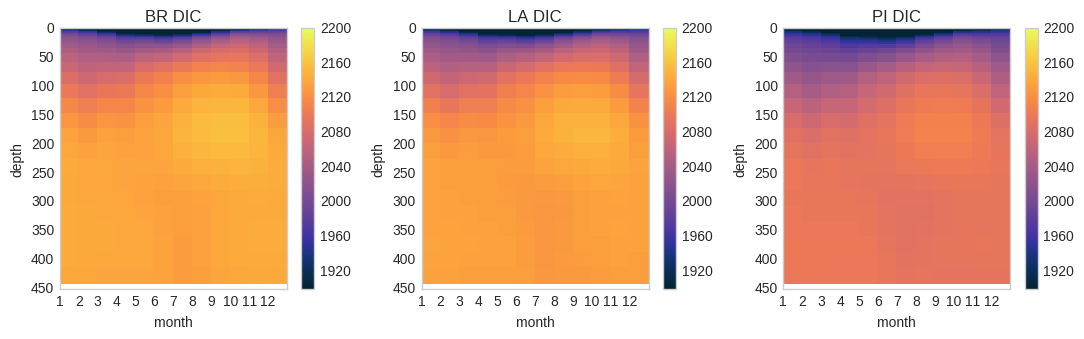

In [22]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 1900
tvmax = 2200
tcmap = cm.cm.thermal

fig = plt.figure(figsize=(11,3.5))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (BR_hov)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('BR DIC') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])
        
    if i == 2:
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (LA_hov)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('LA DIC') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])

    if i == 3:
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (PI_hov)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('PI DIC') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])        
plt.tight_layout()

## Let's visualize this as a per-cell % difference - ie for a given cell, how much does the LA and PI case differ from the BR case? In the LA case, ranges from 0-1%, in the PI case, we see differences of up to 2.7%. As expected, the PI case has more of a difference deeper. In both cases, we see more of a difference in the latter half of the year. does this mean that the BR case or the LA case isn't spunup, or are we seeing deep-water renewal?

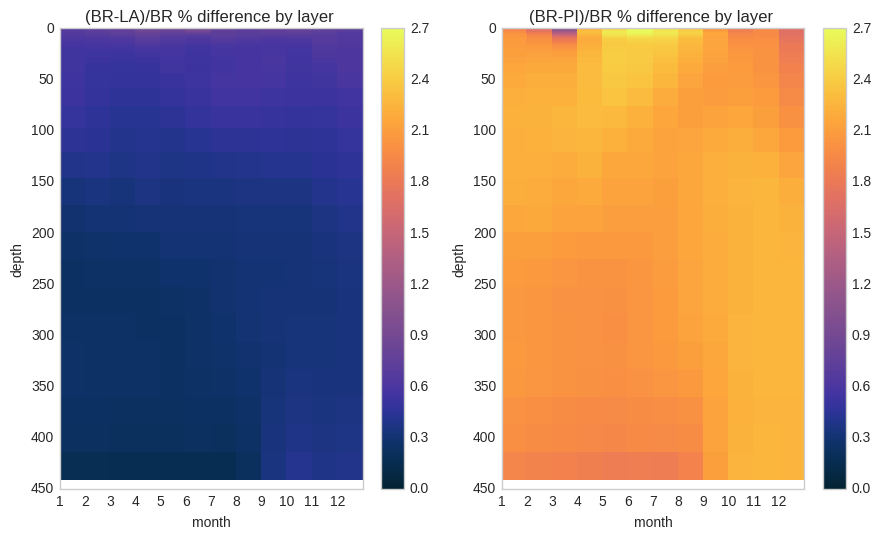

In [23]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
tvmin = 0.0
tvmax = 2.7

fig = plt.figure(figsize=(9,5.5))
nop = 2
for i in range(1,nop+1):
        
    if i == 1:
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (LA_hov_percent)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('(BR-LA)/BR % difference by layer ') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])

    if i == 2:
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (PI_hov_percent)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('(BR-PI)/BR % difference by layer ') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])
        
plt.tight_layout()

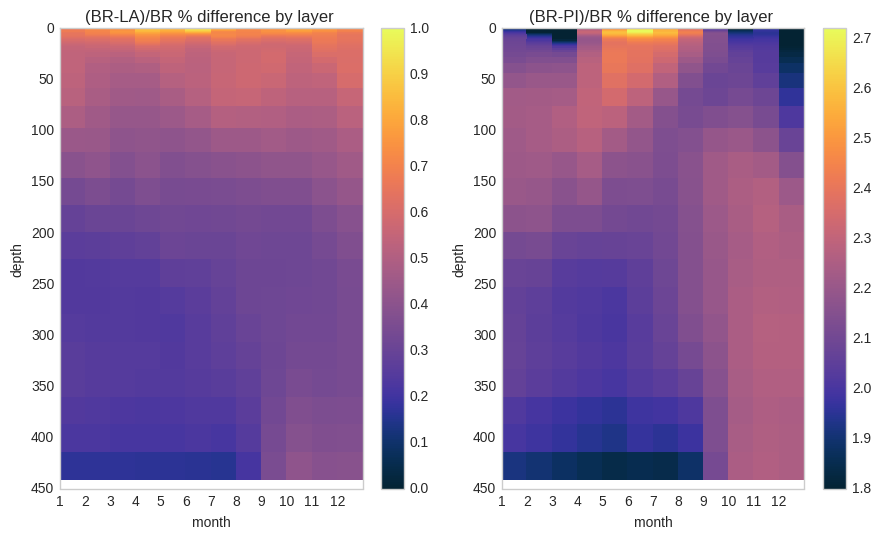

In [24]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])


fig = plt.figure(figsize=(9,5.5))
nop = 2
for i in range(1,nop+1):
        
    if i == 1:
        tvmin = 0.0
        tvmax = 1
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (LA_hov_percent)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('(BR-LA)/BR % difference by layer ') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])

    if i == 2:
        tvmin = 1.8
        tvmax = 2.72        
        
        section_slice = np.arange(1,14,1)
        section_slice2 = np.arange(1,13,1)
        ax = fig.add_subplot(1,nop,i)
        sd = (PI_hov_percent)
        tplt = np.ma.masked_values(sd,0)
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = tcmap, vmin=tvmin, vmax=tvmax)

        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()

        plt.title('(BR-PI)/BR % difference by layer ') 
        ax.set_ylabel('depth')
        ax.set_xlabel('month')
        ax.set_xticks(section_slice)
        ax.set_xticklabels(section_slice2)
        ax.set_xlim([1,13])
        
plt.tight_layout()